In [34]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import os

In [35]:
rootdir = '/lcncluster/lisboa/spikes_audio_diffusion/data'
Data = {}
for rootdir, dirs, files in os.walk(rootdir):
    for subdir in dirs:
        Data[subdir]={}
        dir_path = os.path.join(rootdir, subdir)
        Data[subdir]["sisnr"] = np.load(dir_path + "/metrics.npz")["sisnr"]
        Data[subdir]["specMSE"] = np.load(dir_path + "/metrics.npz")["specMSE"]
        Data[subdir]["wavMSE"] = np.load(dir_path + "/metrics.npz")["wavMSE"]                

spikes_transformer_80
quant_8x10
spikes_transformer_128


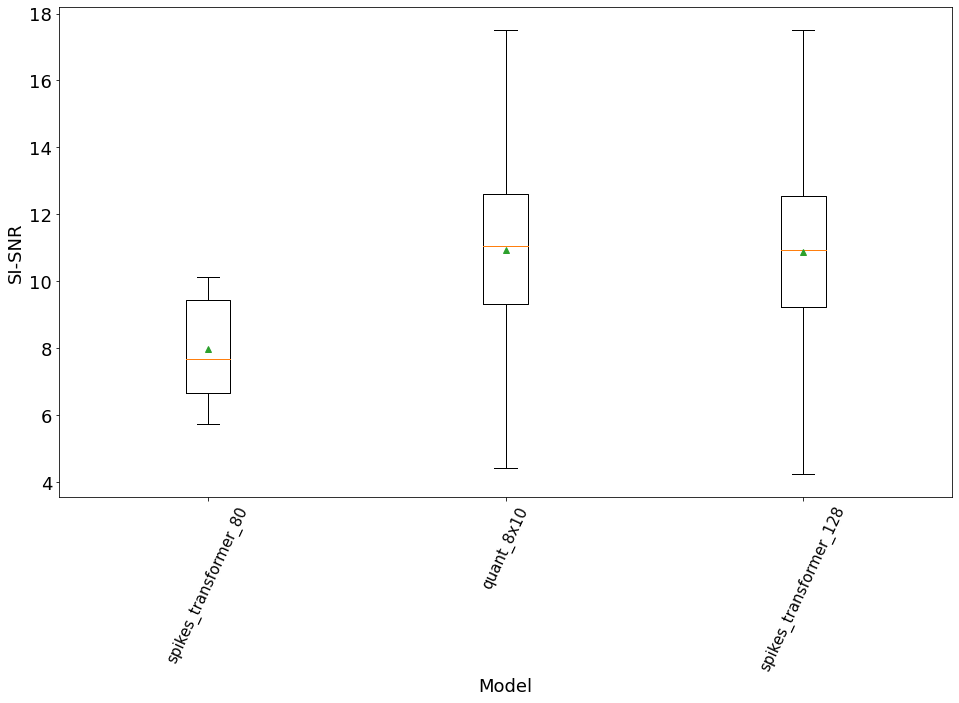

In [36]:
fig,ax = plt.subplots(figsize=(16,9))
labels = []
p = 0
for key, data in Data.items():
    p = p+1
    print(key)
    labels.append(key)
    ax.boxplot(data["sisnr"],showmeans = True, positions = [p],sym='')
    

ax.set_xlabel("Model",fontsize = 18)
ax.xaxis.set_tick_params(labelsize=18)
ax.set_xticklabels(labels, fontsize=15, rotation=65)

ax.set_ylabel("SI-SNR",fontsize = 18)
ax.yaxis.set_tick_params(labelsize=18)

spikes_transformer_80
quant_8x10
spikes_transformer_128


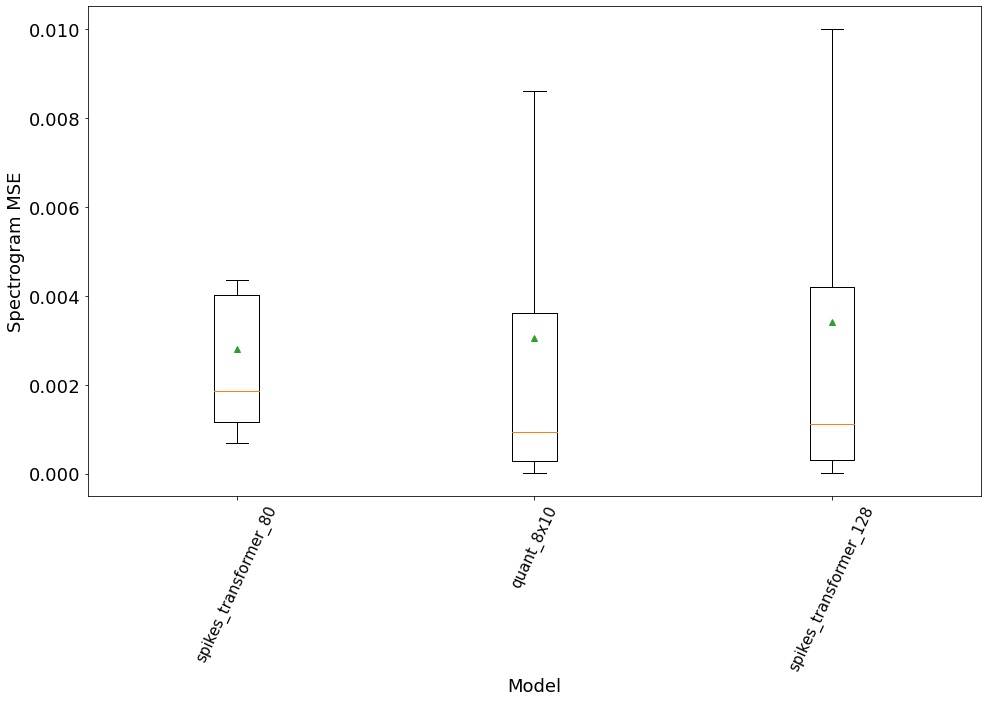

In [37]:
fig,ax = plt.subplots(figsize=(16,9))
labels = []
p = 0
for key, data in Data.items():
    p = p+1
    print(key)
    labels.append(key)
    ax.boxplot(data["specMSE"],showmeans = True, positions = [p],sym='')
    

ax.set_xlabel("Model",fontsize = 18)
ax.xaxis.set_tick_params(labelsize=18)
ax.set_xticklabels(labels, fontsize=15, rotation=65)

ax.set_ylabel("Spectrogram MSE",fontsize = 18)
ax.yaxis.set_tick_params(labelsize=18)

spikes_transformer_80
quant_8x10
spikes_transformer_128


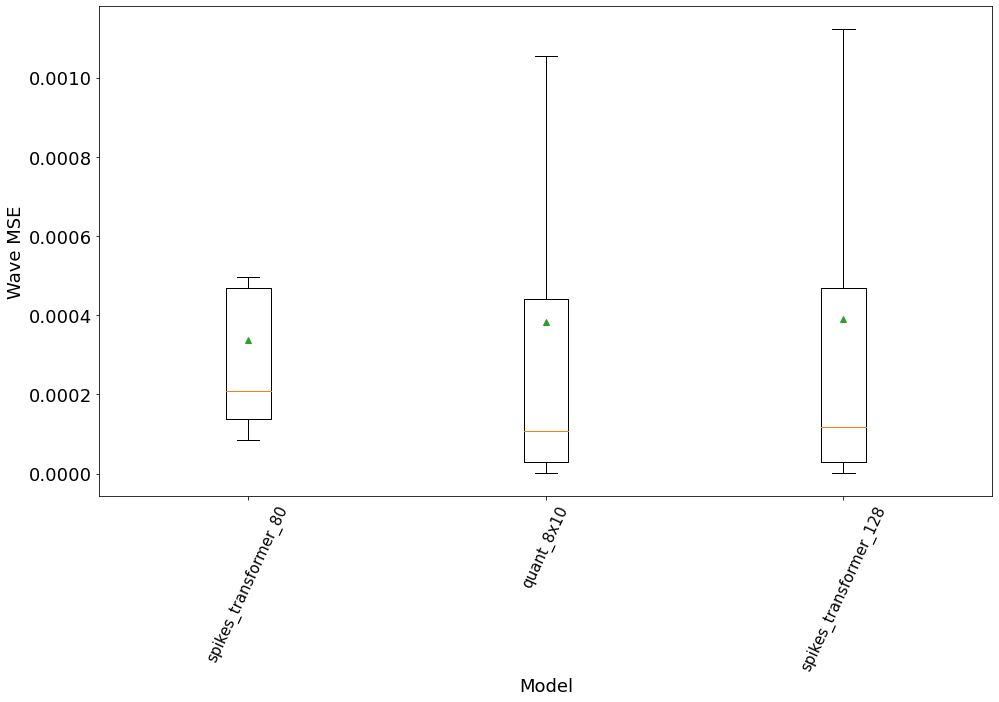

In [38]:
fig,ax = plt.subplots(figsize=(16,9))
labels = []
p = 0
for key, data in Data.items():
    p = p+1
    print(key)
    labels.append(key)
    ax.boxplot(data["wavMSE"],showmeans = True, positions = [p],sym='')
    

ax.set_xlabel("Model",fontsize = 18)
ax.xaxis.set_tick_params(labelsize=18)
ax.set_xticklabels(labels, fontsize=15, rotation=65)

ax.set_ylabel("Wave MSE",fontsize = 18)
ax.yaxis.set_tick_params(labelsize=18)